### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

# Research questions:
---
> (1) Does Gender affect showing up for the scheduled appointment? how?

> (2) Does Age affect showing up? how?

> (3) Does the difference between Appointment day and Schedueled day affect showing up? how?

> (4) Does Alcoholism, Handicaps, Scholarships, Hipertension, SMS-recieved and Diapetes affect showing for an appointment and how?

>(5) What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
% matplotlib inline

In [20]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.4MB/s eta 0:00:01   43% |█████████████▉                  | 4.5MB 32.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.0MB/s eta 0:00:01   12% |████                            | 1.7MB 27.7MB/s eta 0:00:01    44% |██████████████▎                 | 6.0MB 27.0MB/s eta 0:00:01    84% |███████████████████████████     | 11.3MB 27.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


# Reading the file and showing the first five rows

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## At first glance we need to change ScheduledDay and AppointmentDay to an appropriate data type! We need to drop PatientID column and AppointmentID as well

In [63]:
#dropping seemingly useless columns. I used try/except as i like to run the cells multible times
#(it raises an error when run twice cause the columns become already dropped)
try:
    df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
except:
    df.head()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,date_difference
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [4]:
#changing ScheduledDay	AppointmentDay to datetime (date only and dropping time)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Now lets view the data and try to clean it/ Create a date-difference column

In [5]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.shape

(110527, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


### No missing values! Before we begin a date difference column should be added. Also we need to check wither there are any weird entries in some columns.

In [64]:
#renaming the no-show column to avoid confusion
df.rename(columns={"No-show": "No_show"}, inplace=True)

In [6]:
#creating the date-differnce coulumn 
df['date_difference']= df['AppointmentDay']-df['ScheduledDay']
#showing a sample of the new column
df.date_difference[:10]

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
5   2 days
6   2 days
7   2 days
8   0 days
9   2 days
Name: date_difference, dtype: timedelta64[ns]

In [65]:
#checking wither we have any weird entries in Gender and No-show! we could've just checked unique values in both columns!!
x=0
y=0
for i in df['Gender']:
    if i == 'M' or 'F':
        x+=1
for i in df['No_show']:
    if i == 'No' or 'Yes':
        y+=1
print(x==df['Gender'].count())
print(y==df['No_show'].count())
# both true which means all entries for Gender is M and F only and for No_show is Yes and No only; now our data is ready
    

True
True


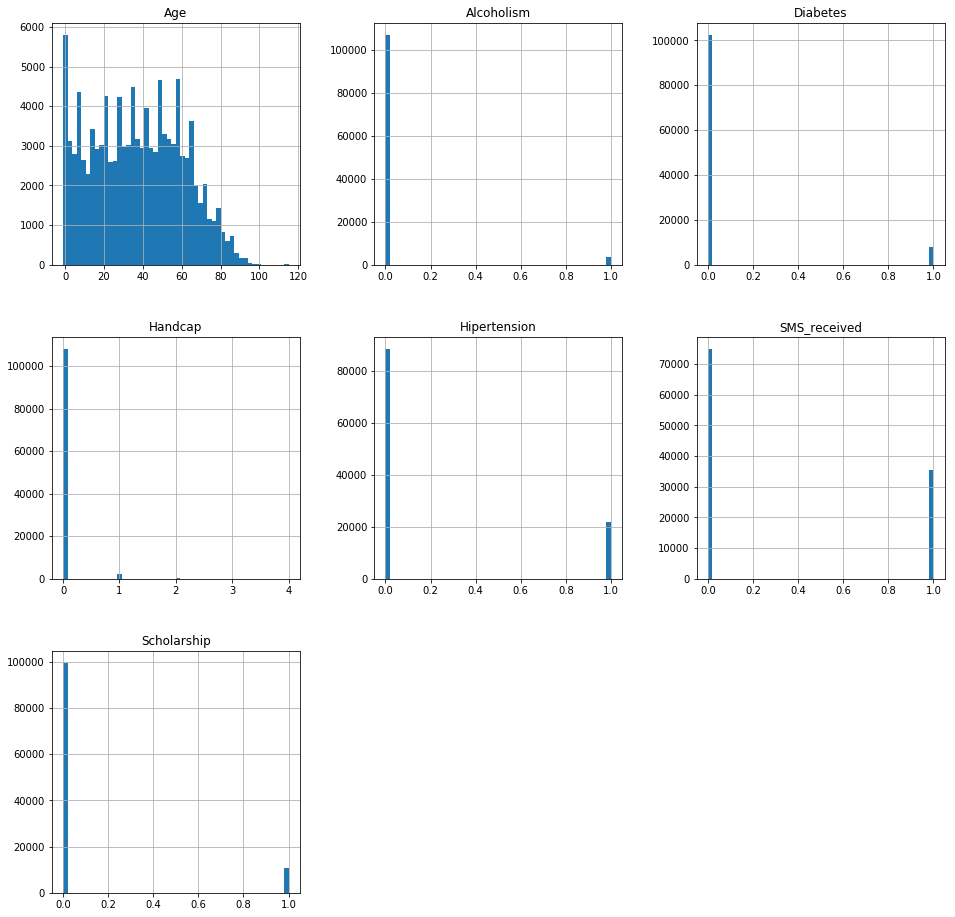

In [9]:
df.hist(figsize=(16,16) ,grid=True, bins= 50)
plt.legend()

Now we know entry range for all the columns: for example 0s and 1s only in alcoholism column which makes sense! We notice the age isn't normally distributed and lots of infants out there!

# (1) Does Gender affect showing up for the scheduled appointment? how?

#### to answer the question we need to compare two results: 
1. males who didn't show to total amount of men 
2. females who didn't show to total amount of women

let's begin by visualizing in a bar chart

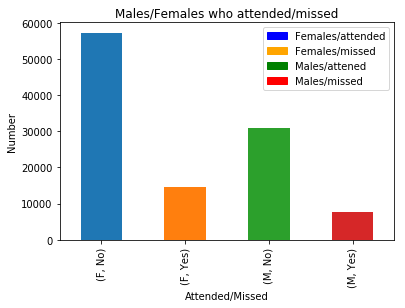

In [14]:
#male to female ratio
df.groupby('Gender')['No_show'].value_counts().plot(kind='bar', title= 'Males/Females who attended/missed')
plt.xlabel('Attended/Missed')
plt.ylabel('Number')
#showing legend in a bar chart!
colors = {'Females/attended':'blue', 'Females/missed':'orange','Males/attened':'green','Males/missed':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

Just by looking at this graph we notice the ratio of females who missed the appointment to the total number of females is very similar to males who missed the appointment to the total number of males. We will test this observation next. 

In [19]:
#calculating the ratio of women who didn't show to all women; then comparing the result to men who didn't show to all the men
print(df.groupby('Gender')['No_show'].value_counts()[1]/(df.groupby('Gender')['No_show'].value_counts()[1]+df.groupby('Gender')['No_show'].value_counts()[0]),df.groupby('Gender')['No_show'].value_counts()[3]/(df.groupby('Gender')['No_show'].value_counts()[3]+df.groupby('Gender')['No_show'].value_counts()[2]))
# Females who didn't show/number of Females : Males who didn't show/number of males
# The result is similar

0.203145879733 0.199679478895


### Gender doesn't affect showing up for the scheduled appointment
We notice that the ratio of women who didn't show to men are almost the same; so Gender doesn't affect showing up to scheduled appointment.

# (2) Does Age affect showing up? how?

In [20]:
#splitting those who showed up from those who didn't
df_show= df.query('No_show == "No"')
df_noshow=df.query('No_show == "Yes"')

Text(0,0.5,'Number')

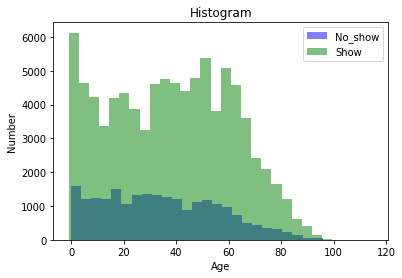

In [66]:
df_noshow.Age.plot(kind='hist',alpha= 0.5, label= 'No_show', bins=30, color='blue');
df_show.Age.plot(kind='hist',alpha= 0.5, label= 'Show', bins=30, color='green');
plt.legend()
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Number')

The number of people missing their appointments derease with age! But I don't think this is an indication of anything as the number of people *NOT* missing their appointments also decreases with age. So now I have to compare both results further. 

In [67]:
print(df_noshow.Age.mean(),df_show.Age.mean())
print(df_noshow.Age.std(),df_show.Age.std())
print(df_noshow.shape)

34.3176665621 37.7900643933
21.9659405108 23.3388782259
(22319, 13)


The mean for those who show is higher than those who don't but i still don't think its an indication as the diffrrence in mean and standartviation might fall in an acceptable statistical range. We're gonna have to test it.

In [25]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(df_noshow.Age, value=df_show.Age.mean())

(-23.616581803935411, 2.6038027593914179e-123)

### Since this p-value is less than .05, we do have sufficient evidence to reject the null hypothesis. In other words, age does indeed affect wither a person will show up! It might seem confusing but since the count of people who didn't show up in this data set is quite large. It was expected for this sample mean to become very close to the population's mean.

# (3) Does the difference between Appointment day and Schedueled day affect showing up? how?

In [68]:
df[['ScheduledDay', 'AppointmentDay','date_difference']].head()

,ScheduledDay,AppointmentDay,date_difference
0,2016-04-29,2016-04-29,0 days
1,2016-04-29,2016-04-29,0 days
2,2016-04-29,2016-04-29,0 days
3,2016-04-29,2016-04-29,0 days
4,2016-04-29,2016-04-29,0 days


In [69]:
#making sure dt.days will return an integer because the date_difference column isn't an integer!
df['date_difference'].dt.days.dtype

dtype('int64')

Text(0.5,1,'Histogram')

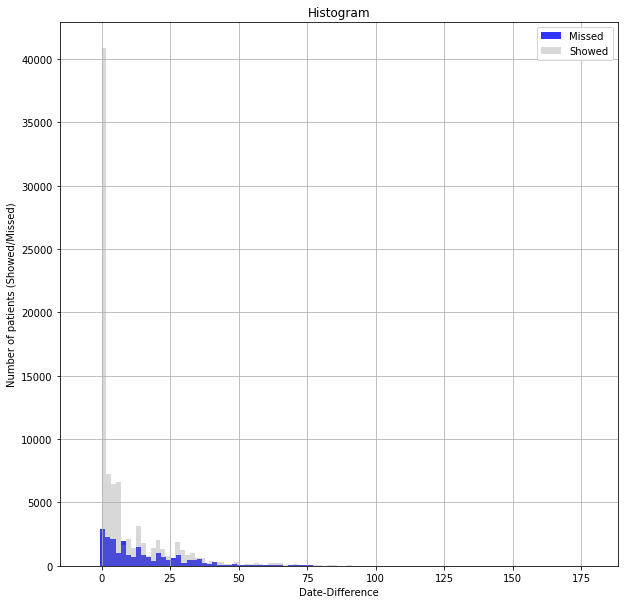

In [70]:
df_noshow.date_difference.dt.days.hist(alpha= 0.8, label= 'Missed', color='blue', bins=100, figsize=(10,10))
df_show.date_difference.dt.days.hist(alpha= 0.3, label= 'Showed', color='grey', bins=100, figsize=(10,10))
plt.legend()
plt.xlabel('Date-Difference')
plt.ylabel('Number of patients (Showed/Missed)')
plt.title('Histogram')

So again the longer the wait the more likely a person won't miss his/her appointment. But both histograms seems  alike and we have to test wither people who miss differ statistically from those who show up for us to make a conclusion. 

In [71]:
ztest(df.date_difference.dt.days, value=df_show.date_difference.dt.days.mean())

(31.143481790041498, 6.2150334568514161e-213)

## Its confirmed the longer the wait the more likely a person won't miss his/her appointment!

# Now we will test for Alcoholism, Handicaps, Scholarships, Hipertension, SMS-recieved and Diapetes...

All of these columns recieve 1s or 0s so to avoid code repetitions we create the following functions:

In [76]:
def barcharts(column1):
    df.groupby(column1)['No_show'].value_counts().plot(kind='bar')
    plt.xlabel(column1+'/No_show')
    plt.ylabel('Number')
    plt.legend()
    plt.title('Bar Chart')
    #trying disperately to show legend
    colors = {'0,Show':'blue', '0,Missed':'orange','1,Show':'green','1,Missed':'red'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
def ratioComparison(column1):
    print(df.groupby(column1)['No_show'].value_counts())
    print("The ratio of no {} who missed the appointment to all is: ".format(column1))
    print(df.groupby(column1)['No_show'].value_counts()[0][1]/(df.groupby(column1)['No_show'].value_counts()[0][1]+df.groupby(column1)['No_show'].value_counts()[0][0]))
    print("The ratio of {} who attened the appointment to all is: ".format(column1))
    print(df.groupby(column1)['No_show'].value_counts()[3]/(df.groupby(column1)['No_show'].value_counts()[3]+df.groupby(column1)['No_show'].value_counts()[2]))


We start by invitigating the alcoholism column

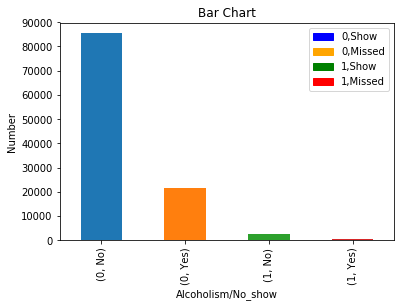

In [47]:
barcharts('Alcoholism')

Column one compated to column two seems similar to column three compated to column four! Let's test that!

In [77]:
ratioComparison('Alcoholism')

Alcoholism  No_show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: No_show, dtype: int64
The ratio of no Alcoholism who missed the appointment to all is: 
0.201946494723
The ratio of Alcoholism who attened the appointment to all is: 
0.201488095238


In [49]:
#confirming the function result
print(21642/(85525+21642),677/(677+2683))

0.20194649472318904 0.20148809523809524


### Alcohol has nothing to do with missing appointments now we test for diabetes effect.

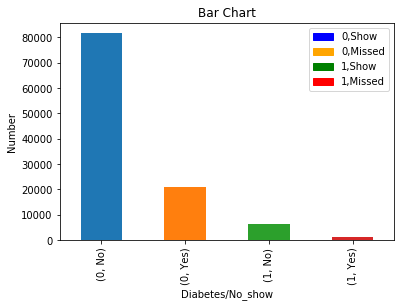

In [50]:
barcharts('Diabetes')

Again, column one compated to column two seems similar to column three compated to column four! Let's test that!

In [78]:
ratioComparison('Diabetes')

Diabetes  No_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: No_show, dtype: int64
The ratio of no Diabetes who missed the appointment to all is: 
0.20362824612
The ratio of Diabetes who attened the appointment to all is: 
0.180032733224


### The compared ratios yielded close but different results! which is an indication that diabetes patients tend to NOT mess their appointments.
### Now SMS-recieved test.

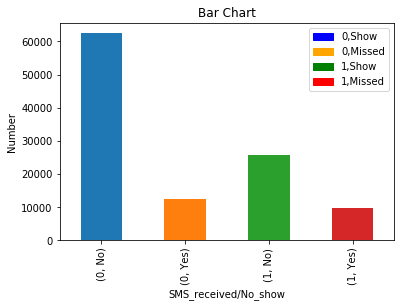

In [52]:
barcharts('SMS_received')

### No need to calculate the ratios here as its clearly visible people who recieve SMS-messages tend to skip the meeting! We call the function to confirm.

In [80]:
ratioComparison('SMS_received')

SMS_received  No_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No_show, dtype: int64
The ratio of no SMS_received who missed the appointment to all is: 
0.167033113465
The ratio of SMS_received who attened the appointment to all is: 
0.275745448396


Clear difference and clear indication!

### Now testing scholarship.

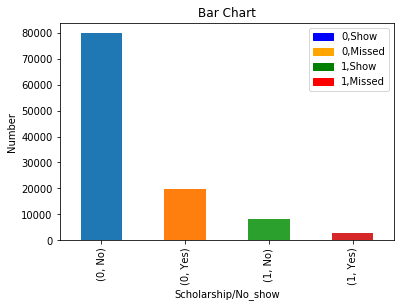

In [54]:
barcharts('Scholarship')

Looks like the ratios aren't similar. Let's confirm!

In [81]:
ratioComparison('Scholarship')

Scholarship  No_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No_show, dtype: int64
The ratio of no Scholarship who missed the appointment to all is: 
0.198071559007
The ratio of Scholarship who attened the appointment to all is: 
0.237363042077


### Having compared the ratios, turns out patients enrolled in Brasilian welfare program tend to miss their doctor's appointments.
### Now Hypertension.

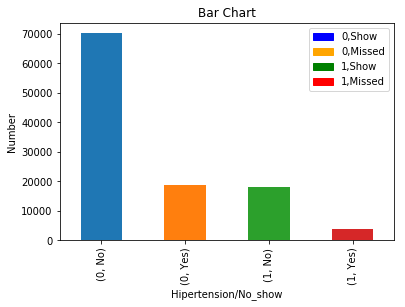

In [56]:
barcharts('Hipertension')

Looks like patients with hyper tension tend to not skip their appointment. Let's confirm!

In [82]:
ratioComparison('Hipertension')

Hipertension  No_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: No_show, dtype: int64
The ratio of no Hipertension who missed the appointment to all is: 
0.209036809954
The ratio of Hipertension who attened the appointment to all is: 
0.173019586258


### Having compared the ratios, turns out patients with Hipertension tend to NOT MISS their doctor's appointments. Now Handicaps.

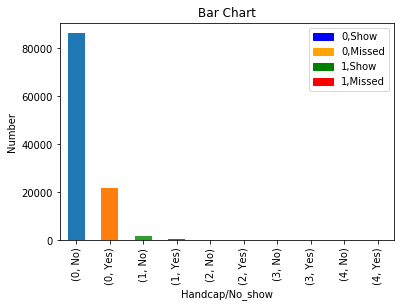

In [58]:
barcharts('Handcap')
# we query any handcaps regardless of their number next

We want to sum all handicaps and compare it to the first column. we do that next.

In [59]:
#number of people with a single or more handcaps
df2=df.query('Handcap >= 1')
df3=df.query('Handcap == 0')
print(df2.query('No_show == "Yes"').count()[2])
print(df2.query('No_show== "No"').count()[2])
print(df3.query('No_show== "No"').count()[2])
print(df3.query('No_show== "Yes"').count()[2])



407
1834
86374
21912


In [104]:
#now we calculate the ratios manually for this special case
print(407/(407+1834),21912/(21912+86374))

0.18161535029004908 0.20235302809227415


### Now we can conclude that handcaps will increase the propability of a patient missing their appointments.

In [60]:
#checking wither we missed any columns
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show', 'date_difference'],
      dtype='object')

In [61]:
#checking number of unique neighbourhood entries.
df['Neighbourhood'].value_counts().count()

81

<a id='conclusions'></a>
## Conclusions

> Columns that has no relation to the results: (Gender , Alcohol)

> People are more likely to attend their appointments when: (Age increase, Hypertension, Patients with Diapetes, the appointment date is far)

> People are more likely to miss their appointments when: (Handicaps exist, Patients with the scholarship, recieving SMS)

> Limitations: We couldn't explore the Neighborhood column as we weren't givin the locations in relation to the hospital/clinic! We would want to figure out wither the distance affect showing to appointments but were not givin suffecient data. as there are **81** unique neiborhood values.

In [83]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0